In [67]:
# to read cobaya input files
from cobaya.yaml import yaml_load_file

# to run the sampler/minimizer
from cobaya.run import run as cobayaRun
# to call CAMB from Cobaya
from cobaya.model import get_model

# to load MCMC chains
from getdist import loadMCSamples, plots

# to analyze the chains
# from getdist.mcsamples import MCSamplesFromCobaya
%matplotlib inline
import matplotlib.pyplot as plt
import getdist.plots as gdplt

import sys

import numpy as np

from scipy import special, optimize, integrate, stats

# Load the DES samples

In [29]:
pathDir = "../../data/planck_chains_2018/COM_CosmoParams_fullGrid_R3.01/"
runParams = "base"
runData = "DES_DESpriors"

runPath = pathDir + runParams + "/" + runData + "/base_" + runData

In [30]:
samplesDES = loadMCSamples(runPath)

## DES: add derived parameters $\Omega_b$, $\Omega_c$, $\Omega_m$ from $\omega_b$, $\omega_c$ and $H_0$

In [31]:
# get list of parameter names
parNamesDES = samplesDES.getParamNames()
# print(parNamesDES)

# get all the samples for each parameter
parDES = samplesDES.getParams()

# Add Omega_c as a new derived parameter
newParVec = parDES.omegach2 / (parDES.H0 / 100.)**2
samplesDES.addDerived(newParVec, "omegac", label='\Omega_c', comment='', range=None)

# Add Omega_m h^2 as a new derived parameter
newParVec = parDES.omegach2 + parDES.omegabh2
samplesDES.addDerived(newParVec, "omegamh2", label='\omega_m', comment='', range=None)

In [32]:
# Check that the parameters were added
# print(parNamesDES)

# Load the Planck samples

Full Planck chain

In [33]:
runParams = "base"
runData = "plikHM_TTTEEE_lowl_lowE"

runPath = pathDir + runParams + "/" + runData + "/base_" + runData


# pathMinimum = runPath + ".minimum"
# pathParamName = runPath + ".paramname"
# pathSamples1 = runPath + "_1.txt"

In [34]:
samplesPlanck = loadMCSamples(runPath)

## Planck: add derived parameters $\Omega_b$, $\Omega_c$, $\Omega_m$ from $\omega_b$, $\omega_c$ and $H_0$

In [35]:
# get list of parameter names
parNamesPlanck = samplesPlanck.getParamNames()
# print(parNamesPlanck)

# # Dictionary giving the parameter indices
# paramIndices = samplesPlanck._getParamIndices()
# iParOmega = str(paramIndices['omegam'])
# # print(paramIndices.keys())
# # print("Param index for omegam: " + str(paramIndices['omegam']))
# # print("Param index for sigma8: " + str(paramIndices['sigma8']))

# get all the samples for each parameter
parPlanck = samplesPlanck.getParams()
# print(parPlanck.omegam)

# Add Omega_b as a new derived parameter
newParVec = parPlanck.omegabh2 / (parPlanck.H0 / 100.)**2
samplesPlanck.addDerived(newParVec, "omegab", label='\Omega_b', comment='', range=None)

# Add Omega_c as a new derived parameter
newParVec = parPlanck.omegach2 / (parPlanck.H0 / 100.)**2
samplesPlanck.addDerived(newParVec, "omegac", label='\Omega_c', comment='', range=None)

In [36]:
# Re-extract parameters and names
# List of parameter names
parNamesPlanck = samplesPlanck.getParamNames()
# get the samples for each parameter
parPlanck = samplesPlanck.getParams()

# Select a subset of the Planck samples, with low $\Omega_m$

Compute confidence limits / quantiles

In [37]:
# Compute confidence limits / quantiles
samplesPlanck.confidence(parPlanck.omegam, 0., upper=False, start=0, end=None, weights=None), \
samplesPlanck.confidence(parPlanck.omegam, 0.05, upper=False, start=0, end=None, weights=None), \
samplesPlanck.confidence(parPlanck.omegam, 0.5, upper=False, start=0, end=None, weights=None), \
samplesPlanck.confidence(parPlanck.omegam, 0.95, upper=False, start=0, end=None, weights=None), \
samplesPlanck.confidence(parPlanck.omegam, 1., upper=False, start=0, end=None, weights=None)

(0.28441, 0.3028564, 0.3164858, 0.3307111, 0.3516251)

Keep only some of the samples

In [38]:
# fraction of samples to keep
frac = 0.05

# corresponding quantile
qOmegam = samplesPlanck.confidence(parPlanck.omegam, frac, upper=False, start=0, end=None, weights=None)

# samples to keep
I = np.where(parPlanck.omegam <= qOmegam)[0]
print("Keeping " + str(len(I)) + " samples out of " + str(len(parPlanck.omegam)))
print("ie keeping a fraction " + str(len(I) / len(parPlanck.omegam)))

Keeping 1306 samples out of 24497
ie keeping a fraction 0.05331265052863616


In [39]:
# keep only the desired samples
cutSamplesPlanck = samplesPlanck.copy()
cutSamplesPlanck.filter(I)

Plot to check this worked

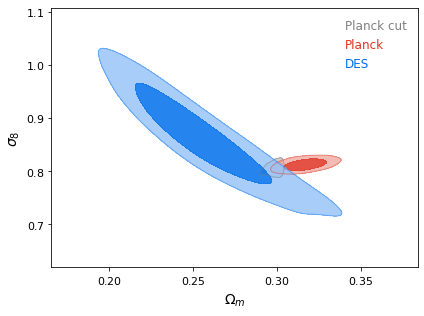

In [40]:
g = plots.get_single_plotter()
g.plot_2d([cutSamplesPlanck, samplesPlanck, samplesDES], ['omegam', 'sigma8'], filled=True)
g.add_legend(['Planck cut', 'Planck', 'DES'], colored_text=True)
# g.export('output_file.pdf')

# Show the Planck-DES tension

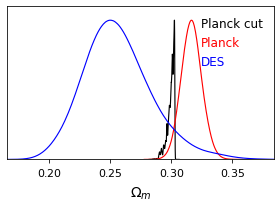

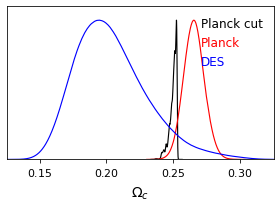

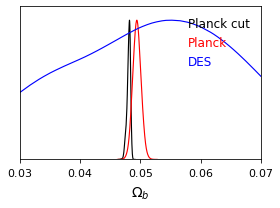

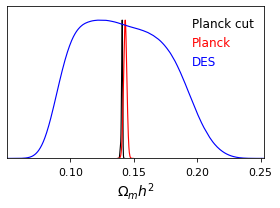

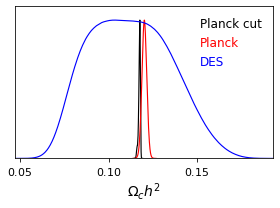

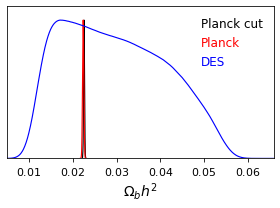

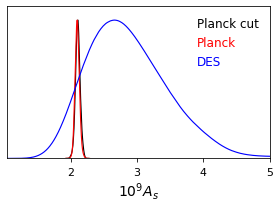

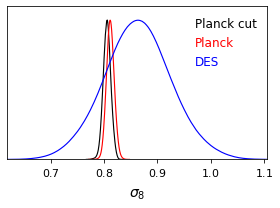

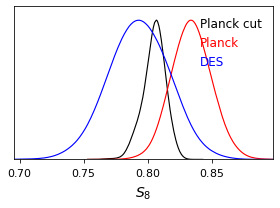

In [41]:
# Show the Omega_m tension
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([cutSamplesPlanck, samplesPlanck, samplesDES], 'omegam', normalized=False)
# g.add_legend(['Planck', 'DES'], colored_text=False, legend_loc='upper right')
g.add_legend(['Planck cut', 'Planck', 'DES'], colored_text=True, legend_loc='upper right')

# Show the Omega_c tension
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([cutSamplesPlanck, samplesPlanck, samplesDES], 'omegac', normalized=False)
# g.add_legend(['Planck', 'DES'], colored_text=False, legend_loc='upper right')
g.add_legend(['Planck cut', 'Planck', 'DES'], colored_text=True, legend_loc='upper right')

# Show the Omega_b tension
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([cutSamplesPlanck, samplesPlanck, samplesDES], 'omegab', normalized=False)
# g.add_legend(['Planck', 'DES'], colored_text=False, legend_loc='upper right')
g.add_legend(['Planck cut', 'Planck', 'DES'], colored_text=True, legend_loc='upper right')

# Show the omega_m tension
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([cutSamplesPlanck, samplesPlanck, samplesDES], 'omegamh2', normalized=False)
# g.add_legend(['Planck', 'DES'], colored_text=False, legend_loc='upper right')
g.add_legend(['Planck cut', 'Planck', 'DES'], colored_text=True, legend_loc='upper right')

# Show the Omega_c h^2 tension
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([cutSamplesPlanck, samplesPlanck, samplesDES], 'omegach2', normalized=False)
# g.add_legend(['Planck', 'DES'], colored_text=False, legend_loc='upper right')
g.add_legend(['Planck cut', 'Planck', 'DES'], colored_text=True, legend_loc='upper right')

# Show the Omega_b h^2 tension
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([cutSamplesPlanck, samplesPlanck, samplesDES], 'omegabh2', normalized=False)
# g.add_legend(['Planck', 'DES'], colored_text=False, legend_loc='upper right')
g.add_legend(['Planck cut', 'Planck', 'DES'], colored_text=True, legend_loc='upper right')

# A_S is consistent 
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([cutSamplesPlanck, samplesPlanck, samplesDES], 'A', normalized=False)
g.add_legend(['Planck cut', 'Planck', 'DES'], colored_text=True, legend_loc='upper right')

# sigma_8 is consistent 
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([cutSamplesPlanck, samplesPlanck, samplesDES], 'sigma8', normalized=False)
g.add_legend(['Planck cut', 'Planck', 'DES'], colored_text=True, legend_loc='upper right')

# S8 is consistent 
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([cutSamplesPlanck, samplesPlanck, samplesDES], 'S8', normalized=False)
g.add_legend(['Planck cut', 'Planck', 'DES'], colored_text=True, legend_loc='upper right')

The tension is mostly in $\Omega_m$.

# Understanding the degeneracies between cosmological parameters in Planck

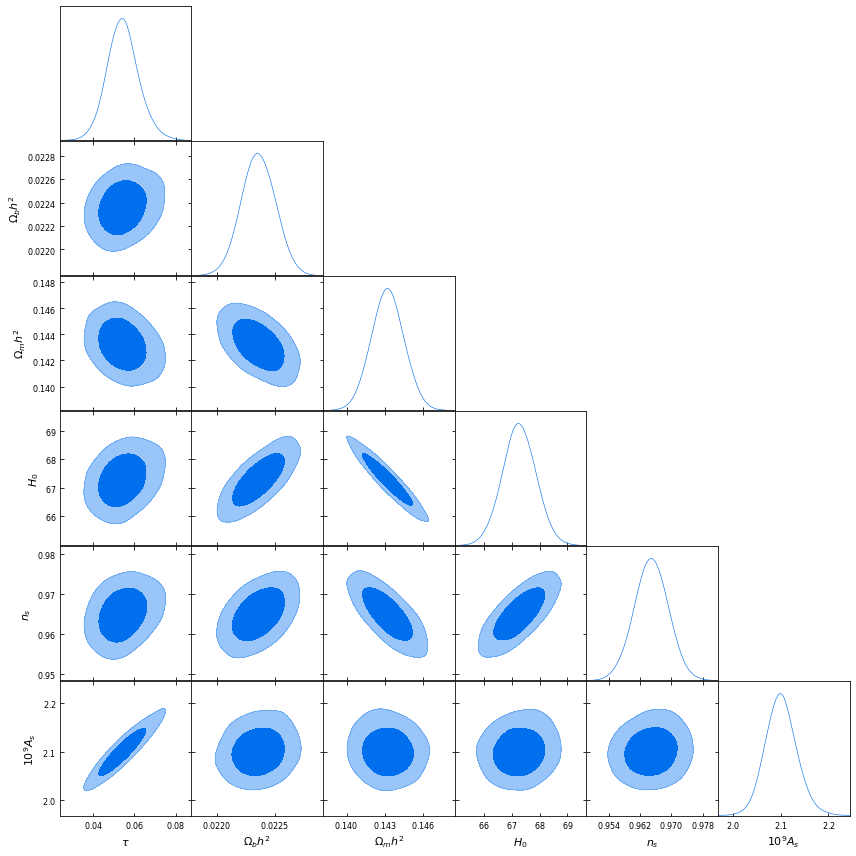

In [42]:
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot(samplesPlanck, ['tau', 'omegabh2', 'omegamh2', 'H0', 'ns', 'A'], filled=True)

This is the parameter set considered in Planck LI 2017 (except for $A_S$ instead of $A_S e^{-2\tau}$)Here the main degeneracies are:
- $A_S$ and $\tau$ are correlated, as expected
- $\Omega_m h^2$ and $H_0$ are anticorrelated
- $\Omega_m h^2$ and $n_S$ are anticorrelated
- $H_0$ and $n_S$ are correlated
- $\Omega_b h^2$ and $H_0$ are correlated
- $\Omega_m h^2$ and $\Omega_b h^2$ are anticorrelated

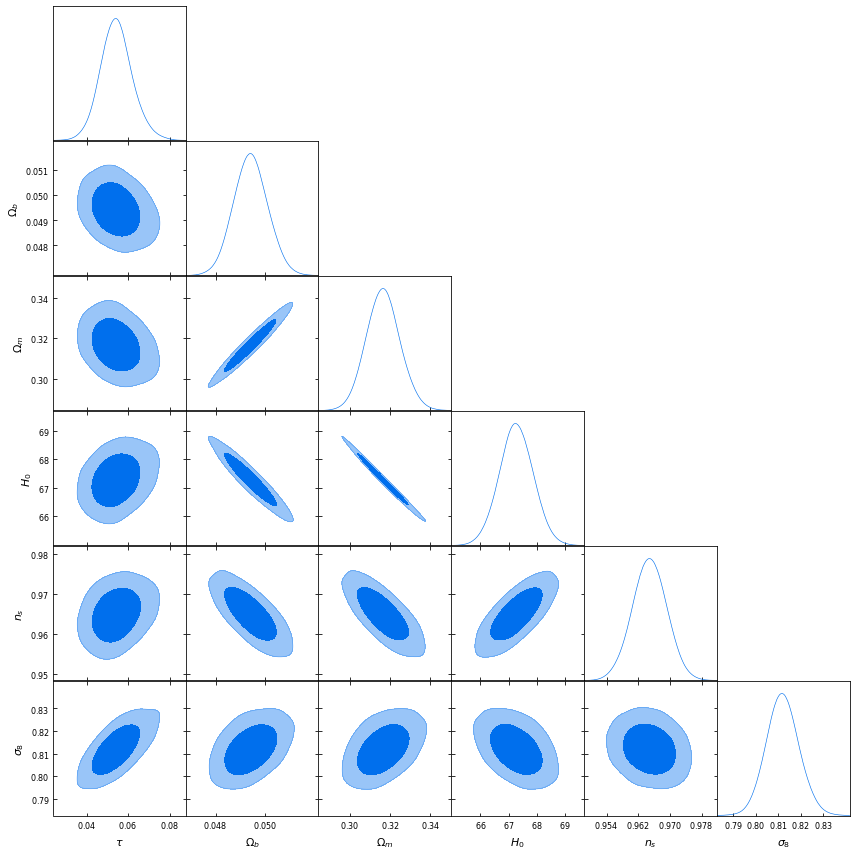

In [43]:
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot(samplesPlanck, ['tau', 'omegab', 'omegam', 'H0', 'ns', 'sigma8'], filled=True)

And here is a parameter combination which includes $\Omega_m$ and $\sigma_8$, the parameters of interest for the tension.
Some degeneracy directions are changed! eg, $\Omega_b h^2$ to $\Omega$.

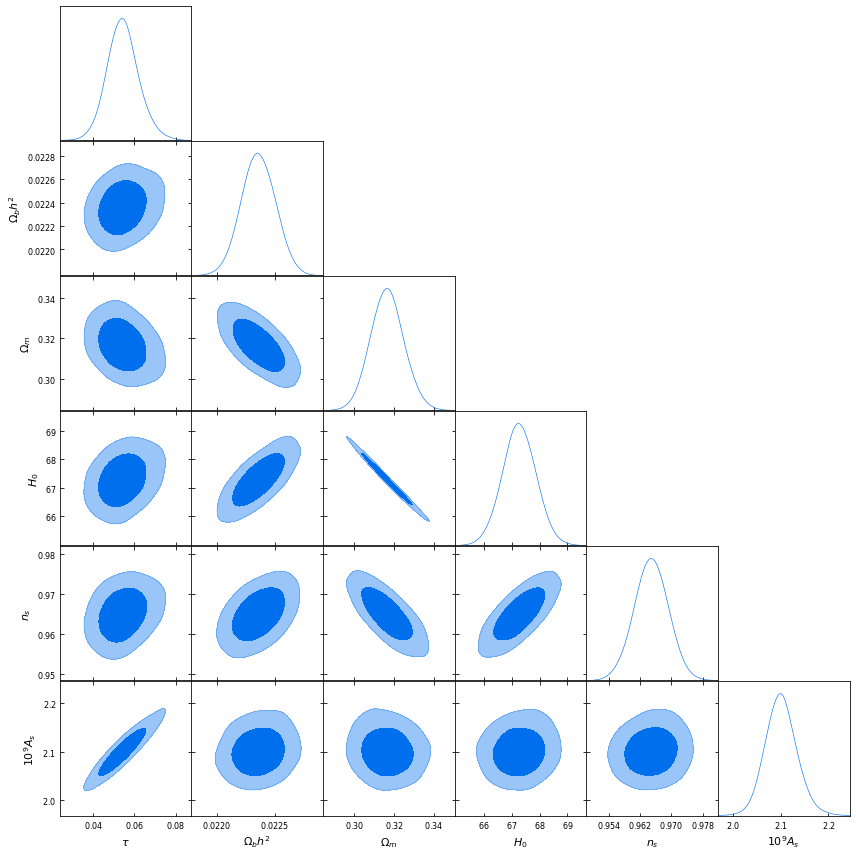

In [44]:
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot(samplesPlanck, ['tau', 'omegabh2', 'omegam', 'H0', 'ns', 'A'], filled=True)

Here I use the parameterization which is easiest to give as input to CAMB.
A low $\Omega_m$ can be compensated with a high $\omega_b$, a high $n_S$, a high $H_0$.
This is confirmed below by looking at the derivatives.
- $\Omega_m$ is highly anticorrelated with $H_0$. This is likely the geometric degeneracy: increasing $H_0$ or $\Omega_m$ decreases the distance to the CMB.
- $\Omega_m$ is anticorrelated with $\omega_b$. This may be due to the $h^2$ in $\omega_b$?
- $\Omega_m$ is anticorrelated with $n_S$. As we show below, increasing either of these parameters adds a positive trend of $C_\ell^{TT}$ with $\ell$. This is obvious for $n_S$. For $\Omega_m$, this may be because increasing $\Omega_m$ decreases Silk damping? (I thought increasing $\Omega_m h^2$ increases Silk damping...)

# Given a chain, compute Cl from the mean posterior parameters

This is where all the magic happens...

In [45]:
def getCambParamsFromSamples(samples):
    # Convert parameter mean array into dictionary
    means = samples.getMeans()
    paramIndices = samples._getParamIndices()
    meansDict = {}
    for key in paramIndices.keys():
        iPar = paramIndices[key]
        meansDict[key] = means[iPar]
    
    # Convert to Cobaya/CAMB input format
    params = {
        'ombh2': meansDict['omegabh2'], 
        'omch2': meansDict['omegach2'], 
        'H0': meansDict['H0'], 
        'tau': meansDict['tau'],
        'As': meansDict['A'] * 1.e-9, 
        'ns': meansDict['ns']}
    
    return params


def getCambParamStdFromSamples(samples):
    # Convert parameter mean array into dictionary
    std = np.sqrt(samples.getVars())
    paramIndices = samples._getParamIndices()
    stdDict = {}
    for key in paramIndices.keys():
        iPar = paramIndices[key]
        stdDict[key] = std[iPar]
    
    # Convert to Cobaya/CAMB input format
    params = {
        'ombh2': stdDict['omegabh2'], 
        'omch2': stdDict['omegach2'], 
        'H0': stdDict['H0'], 
        'tau': stdDict['tau'],
        'As': stdDict['A'] * 1.e-9, 
        'ns': stdDict['ns']}
    
    return params

In [46]:
def getCl(params):
    
    packages_path = '/global/cscratch1/sd/eschaan/project_s8/code/cobaya_exploration/input/cobaya_packages'

    info_fiducial = {
        'params': params,
        'likelihood': {'one': None},
        'theory': {'camb': {"extra_args": {"num_massive_neutrinos": 1}}},
        'packages_path': packages_path}

    l_max = 3000

    model_fiducial = get_model(info_fiducial)

    # Declare our desired theory product
    # (there is no cosmological likelihood doing it for us)
#     model_fiducial.add_requirements({"Cl": {'tt': l_max, 'te': l_max, 'ee': l_max}})
    model_fiducial.add_requirements({"Cl": {'tt': l_max, 'te': l_max, 'ee': l_max},
                                "thetastar": None})

    # Compute and extract the CMB power spectrum
    # (In muK^-2, without l(l+1)/(2pi) factor)
    # notice the empty dictionary below: all parameters are fixed
    model_fiducial.logposterior({})
    ClPlanck = model_fiducial.provider.get_Cl(ell_factor=False, units="muK2")

    # Our fiducial power spectrum
    ClTTPlanck = ClPlanck['tt'][:l_max + 1]
    ClTEPlanck = ClPlanck['te'][:l_max + 1]
    ClEEPlanck = ClPlanck['ee'][:l_max + 1]
    L = np.arange(l_max+1)
    
    # get the derived parameter theta
    thetaStar = model_fiducial.theory['camb']._states[0]['derived_extra']['thetastar']
    
    return L, ClTTPlanck, ClTEPlanck, ClEEPlanck, thetaStar

## Compute Cl for the full Planck Chain

In [47]:
L, ClTTPlanck, ClTEPlanck, ClEEPlanck, thetaStarPlanck = getCl(getCambParamsFromSamples(samplesPlanck))

[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


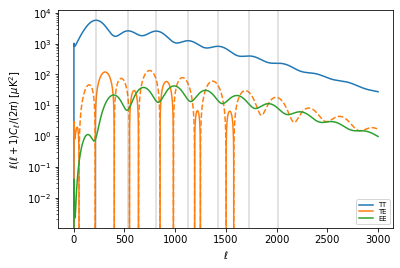

In [48]:
fig=plt.figure(0)
ax=fig.add_subplot(111)
#
ax.plot(L, L*(L+1.)/(2.*np.pi) * ClTTPlanck, label=r'TT')
plot=ax.plot(L, L*(L+1.)/(2.*np.pi) * ClTEPlanck, label=r'TE')
ax.plot(L, -L*(L+1.)/(2.*np.pi) * ClTEPlanck, ls='--', c=plot[0].get_color())
ax.plot(L, L*(L+1.)/(2.*np.pi) * ClEEPlanck, label=r'EE')
#
# Add quick markers to roughly locate the acoustic peaks
for l in L[50:]:
    value = L[l]**2*ClTTPlanck[l]
    nearbyValues = L[l-10:l+10]**2*ClTTPlanck[l-10:l+10]
    if value==np.max(nearbyValues):
        ax.axvline(l, c='gray', alpha=0.3)
#
ax.legend(loc=4, fontsize='x-small', labelspacing=0.1)
ax.set_yscale('log', nonpositive='clip')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell(\ell+1) C_\ell / (2\pi)$ [$\mu$K$^2$]')

plt.show()

## Do it for the cut Planck chain and compare

In [49]:
L, ClTTPlanckCut, ClTEPlanckCut, ClEEPlanckCut, thetaStarPlanckCut = getCl(getCambParamsFromSamples(cutSamplesPlanck))

[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


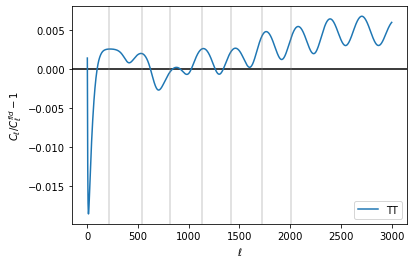

In [50]:
fig=plt.figure(0)
ax=fig.add_subplot(111)
#
ax.axhline(0., c='k')
#
ax.plot(L, ClTTPlanckCut / ClTTPlanck - 1., label=r'TT')
#
# Add quick markers to roughly locate the acoustic peaks
for l in L[50:]:
    value = L[l]**2*ClTTPlanck[l]
    nearbyValues = L[l-10:l+10]**2*ClTTPlanck[l-10:l+10]
    if value==np.max(nearbyValues):
        ax.axvline(l, c='gray', alpha=0.3)
#
ax.legend(loc=4)
# ax.set_yscale('log', nonpositive='clip')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C_\ell / C_\ell^{fid} - 1$')

plt.show()

/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


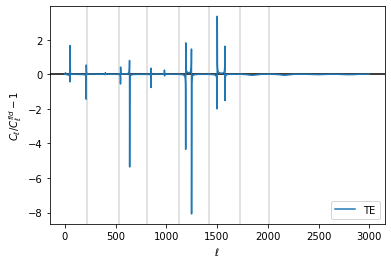

In [51]:
fig=plt.figure(0)
ax=fig.add_subplot(111)
#
ax.axhline(0., c='k')
#
ax.plot(L, ClTEPlanckCut / ClTEPlanck - 1., label=r'TE')
#
# Add quick markers to roughly locate the acoustic peaks
for l in L[50:]:
    value = L[l]**2*ClTTPlanck[l]
    nearbyValues = L[l-10:l+10]**2*ClTTPlanck[l-10:l+10]
    if value==np.max(nearbyValues):
        ax.axvline(l, c='gray', alpha=0.3)
#
ax.legend(loc=4)
# ax.set_yscale('log', nonpositive='clip')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C_\ell / C_\ell^{fid} - 1$')

plt.show()

There must be a numerical issue in the TE calculation. I ignore it for now, focusing on TT.

/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


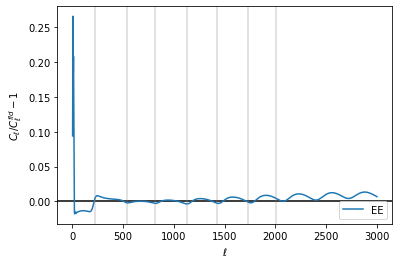

In [52]:
fig=plt.figure(0)
ax=fig.add_subplot(111)
#
ax.axhline(0., c='k')
#
ax.plot(L, ClEEPlanckCut / ClEEPlanck - 1., label=r'EE')
#
# Add quick markers to roughly locate the acoustic peaks
for l in L[50:]:
    value = L[l]**2*ClTTPlanck[l]
    nearbyValues = L[l-10:l+10]**2*ClTTPlanck[l-10:l+10]
    if value==np.max(nearbyValues):
        ax.axvline(l, c='gray', alpha=0.3)
#
ax.legend(loc=4)
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C_\ell / C_\ell^{fid} - 1$')

plt.show()

# Compute response of $C_\ell$ to cosmological parameters

Compute $\partial C_\ell / \partial p$ for $p \in \{ \tau, \omega_b, \omega_c, H_0, n_S, A_S \}$

Choose the high/low values of parameters to estimate the derivatives with finite difference.

In [53]:
# mean values from the full chains
params = getCambParamsFromSamples(samplesPlanck)
# std from the full chain
paramStd = getCambParamStdFromSamples(samplesPlanck)

# print(params)
# print(paramStd)

# choose the low and high values separated by a few sigmas
paramsLow = params.copy()
paramsHigh = params.copy()
for key in params.keys():
    paramsLow[key] = params[key] - 3. *paramStd[key]
    paramsHigh[key] = params[key] + 3. *paramStd[key]

# print(paramsLow)
# print(paramsHigh)

In [54]:
dCldOldTT = {}
dCldOldTE = {}
dCldOldEE = {}
dThetaStardOld = {}

for key in params.keys():
    parNew = params.copy()
    parNew[key] = paramsHigh[key]
    L, ClTTH, ClTEH, ClEEH, thetaStarH = getCl(parNew)
    parNew = params.copy()
    parNew[key] = paramsLow[key]
    L, ClTTL, ClTEL, ClEEL, thetaStarL = getCl(parNew)
    
    dCldOldTT[key] = (ClTTH - ClTTL) / (paramsHigh[key] - paramsLow[key])
    dThetaStardOld[key] = (thetaStarH - thetaStarL) / (paramsHigh[key] - paramsLow[key])

[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value

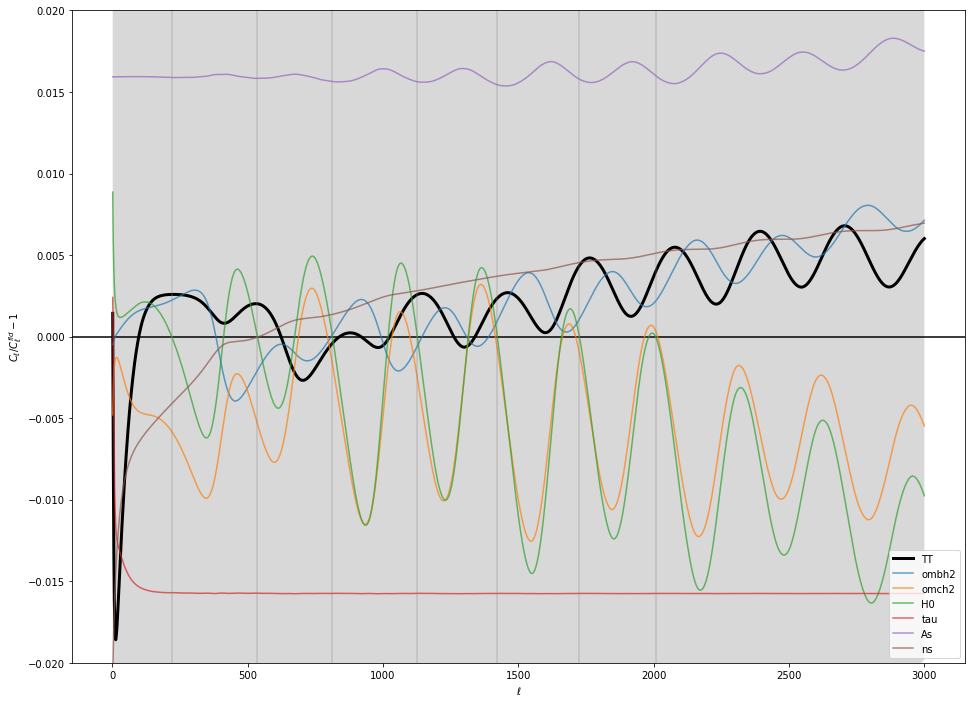

In [55]:
fig=plt.figure(0, figsize=(16, 12))
ax=fig.add_subplot(111)
#
ax.axhline(0., c='k')
#
ax.plot(L, ClTTPlanckCut / ClTTPlanck - 1., 'k', lw=3, label=r'TT')
#
# Add error band for cosmic variance
dL = 1.#100.   # ell bin width
fSky = 0.5
sCosmicVar = np.sqrt(2.) / np.sqrt((2. * L + 1.) * dL * fSky)
ax.fill_between(L, ClTTPlanckCut/ClTTPlanck-1. - sCosmicVar, ClTTPlanckCut/ClTTPlanck-1. + sCosmicVar, alpha=0.3, ec=None, fc='gray')
#
# Add response to cosmological parameters
for key in dCldOldTT.keys():
    ax.plot(L, paramStd[key] * dCldOldTT[key]/ClTTPlanck, alpha=0.7, label=key)

#
# Add quick markers to roughly locate the acoustic peaks
for l in L[50:]:
    value = L[l]**2*ClTTPlanck[l]
    nearbyValues = L[l-10:l+10]**2*ClTTPlanck[l-10:l+10]
    if value==np.max(nearbyValues):
        ax.axvline(l, c='gray', alpha=0.3)
#
ax.legend(loc=4)
# ax.set_yscale('log', nonpositive='clip')
# ax.set_ylim((-0.01, 0.01))
ax.set_ylim((-0.02, 0.02))
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C_\ell / C_\ell^{fid} - 1$')

plt.show()

- the baryon density shifts the BAO peaks by changing the sound speed up until recombination. It causes the asymmetry between odd and even peaks (baryon loading). It enhances the high ell power spectrum, by reducing Silk damping?
- the dark matter density also shifts the BAO peaks, presumably by changing the sound horizon at recombination? It also changes the overall envelope (by reducing the radiation driving?)
- in this parametrization, $H0$ and the dark matter density have very similar effects. Probably the geometric degeneracy?
- the optical depth and the amplitude of scalar fluctuations have the expected effect.

The triangle plot above showed a degeneracy between low $\Omega_m$ and high $\omega_b, n_S, H_0$.
This seems confirmed here for $\omega_b, n_S$, and maybe less obvious for $H_0$.

# Load the measured binned Planck power spectra and error bars

In [56]:
pathPlanckSpectra = '/global/cscratch1/sd/eschaan/project_s8/data/planck_spectra_2018/COM_PowerSpect_CMB-TT-binned_R3.01.txt'

In [57]:
planckSpectra = np.genfromtxt(pathPlanckSpectra)

In [58]:
LPlanckSpectra = planckSpectra[:,0]
DLPlanckSpectra = planckSpectra[:,1]
dDLMinusPlanckSpectra = planckSpectra[:,2]
dDLPlusPlanckSpectra = planckSpectra[:,3]
DLBestFitPlanckSpectra = planckSpectra[:,4]

Text(0, 0.5, '$\\mathcal{D}_\\ell^{measured} / \\mathcal{D}_\\ell^{best fit}$')

INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode


[matplotlib.mathtext] Substituting symbol D from STIXNonUnicode


INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode


[matplotlib.mathtext] Substituting symbol D from STIXNonUnicode


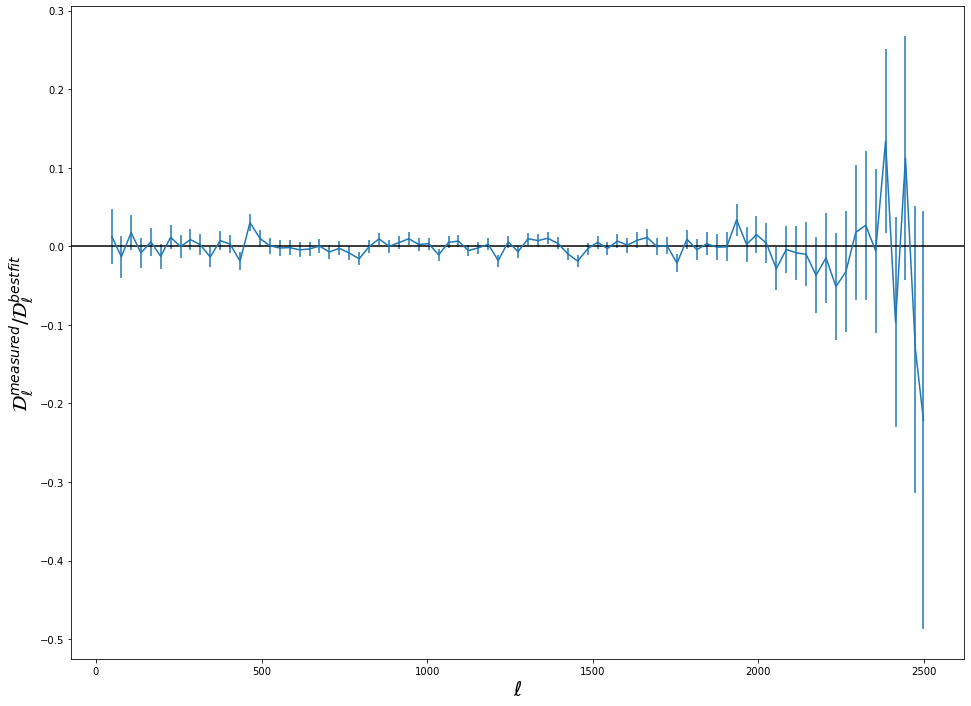

In [59]:
fig=plt.figure(0, figsize=(16, 12))
ax=fig.add_subplot(111)
#
ax.axhline(0., c='k')
#
ax.errorbar(LPlanckSpectra, DLPlanckSpectra/DLBestFitPlanckSpectra - 1., 
            yerr=[dDLMinusPlanckSpectra/DLBestFitPlanckSpectra, dDLPlusPlanckSpectra/DLBestFitPlanckSpectra])
#
ax.set_xlabel(r'$\ell$', fontsize=20)
ax.set_ylabel(r'$\mathcal{D}_\ell^{measured} / \mathcal{D}_\ell^{best fit}$', fontsize=20)


# Load the measured unbinned Planck power spectra and error bars

In [60]:
pathPlanckSpectra = '/global/cscratch1/sd/eschaan/project_s8/data/planck_spectra_2018/COM_PowerSpect_CMB-TT-full_R3.01.txt'
planckSpectra = np.genfromtxt(pathPlanckSpectra)

LPlanckSpectra = planckSpectra[:,0]
DLPlanckSpectra = planckSpectra[:,1]
dDLMinusPlanckSpectra = planckSpectra[:,2]
dDLPlusPlanckSpectra = planckSpectra[:,3]
# DLBestFitPlanckSpectra = planckSpectra[:,4]

In [61]:
LPlanckSpectra

array([2.000e+00, 3.000e+00, 4.000e+00, ..., 2.506e+03, 2.507e+03,
       2.508e+03])

/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


Text(0.5, 1.0, 'Ratio of error bar to cosmic variance')

INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode


[matplotlib.mathtext] Substituting symbol D from STIXNonUnicode


INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode


[matplotlib.mathtext] Substituting symbol D from STIXNonUnicode


INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode


[matplotlib.mathtext] Substituting symbol D from STIXNonUnicode


INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode


[matplotlib.mathtext] Substituting symbol D from STIXNonUnicode


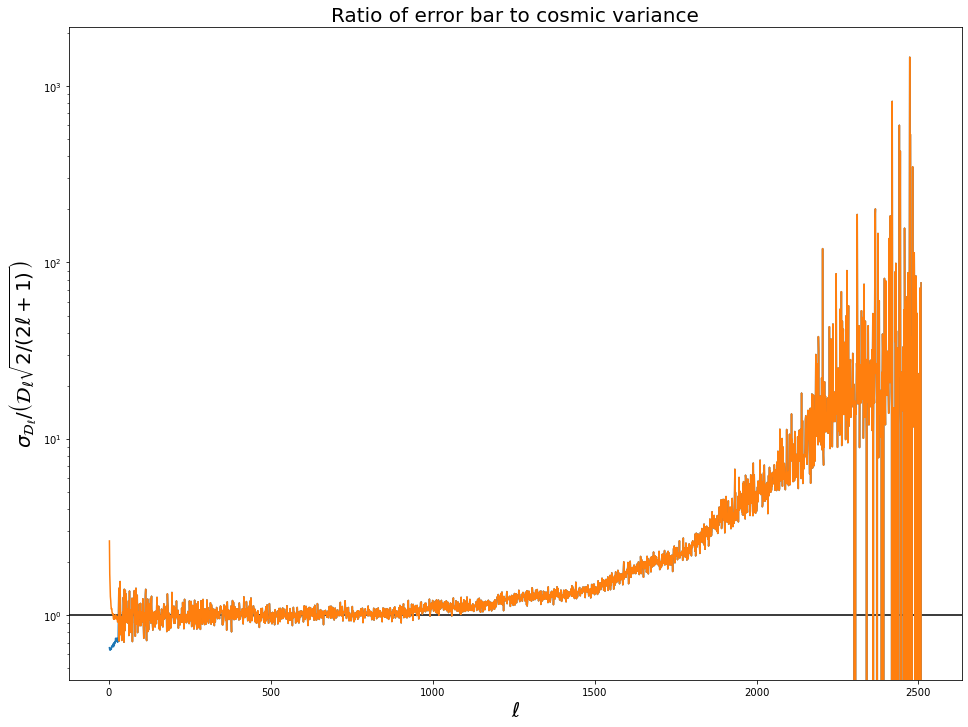

In [62]:
fig=plt.figure(0, figsize=(16, 12))
ax=fig.add_subplot(111)
#
ax.axhline(1., c='k')
#
fSky = 0.5
ratioMinus = dDLMinusPlanckSpectra.copy()
ratioMinus /= DLPlanckSpectra * np.sqrt(2.) / np.sqrt(fSky * (2.*LPlanckSpectra+1.))
ax.plot(LPlanckSpectra, ratioMinus)
ratioPlus = dDLPlusPlanckSpectra.copy()
ratioPlus /= DLPlanckSpectra * np.sqrt(2.) / np.sqrt(fSky * (2.*LPlanckSpectra+1.))
ax.plot(LPlanckSpectra, ratioPlus)
#
ax.set_yscale('log', nonposy='clip')
ax.set_xlabel(r'$\ell$', fontsize=20)
ax.set_ylabel(r'$\sigma_{\mathcal{D}_\ell} / \left( \mathcal{D}_\ell \sqrt{2 / (2\ell+1)} \right)$', fontsize=20)
ax.set_title(r'Ratio of error bar to cosmic variance', fontsize=20)


This just checks that the error bars match the expected cosmic variance (for a reasonable fsky) at low $\ell$, then shoot up due to the noise.

# Add the error bars to the $\delta C_\ell$ plot (unbinned)

/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/global/homes/e/eschaan/.conda/envs/base3/lib/python3.

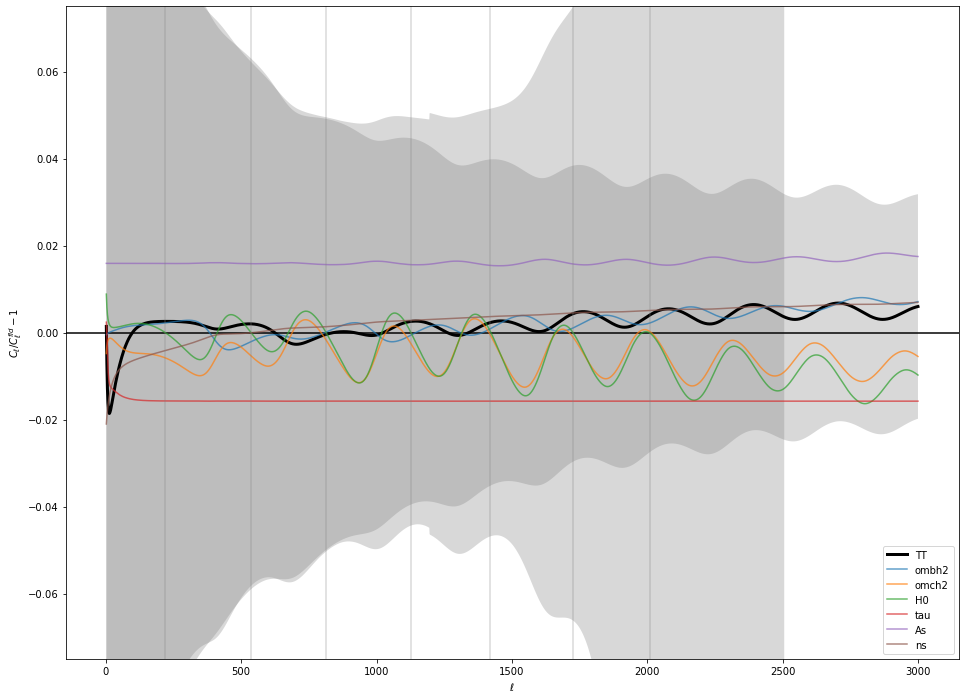

In [63]:
fig=plt.figure(0, figsize=(16, 12))
ax=fig.add_subplot(111)
#
ax.axhline(0., c='k')
#
ax.plot(L, ClTTPlanckCut / ClTTPlanck - 1., 'k', lw=3, label=r'TT')
#
# Add error band for cosmic variance
dL = 1.#100.   # ell bin width
fSky = 0.5
sCosmicVar = np.sqrt(2.) / np.sqrt((2. * L + 1.) * dL * fSky)
ax.fill_between(L, ClTTPlanckCut/ClTTPlanck-1. - sCosmicVar, ClTTPlanckCut/ClTTPlanck-1. + sCosmicVar, alpha=0.3, ec=None, fc='gray')
#
# Actual error bar
iMax = min(len(L), len(LPlanckSpectra))
DlToCl = 2.*np.pi / (LPlanckSpectra * (LPlanckSpectra + 1.))
minus = (ClTTPlanckCut[:iMax] - dDLMinusPlanckSpectra[:iMax]*DlToCl) / ClTTPlanck[:iMax] - 1.
plus = (ClTTPlanckCut[:iMax] + dDLPlusPlanckSpectra[:iMax]*DlToCl) / ClTTPlanck[:iMax] - 1.
ax.fill_between(L[:iMax], minus, plus, alpha=0.3, ec=None, fc='gray')

# Add response to cosmological parameters
for key in dCldOldTT.keys():
    ax.plot(L, paramStd[key] * dCldOldTT[key]/ClTTPlanck, alpha=0.7, label=key)
#
# Add quick markers to roughly locate the acoustic peaks
for l in L[50:]:
    value = L[l]**2*ClTTPlanck[l]
    nearbyValues = L[l-10:l+10]**2*ClTTPlanck[l-10:l+10]
    if value==np.max(nearbyValues):
        ax.axvline(l, c='gray', alpha=0.3)
#
ax.legend(loc=4)
# ax.set_xscale('log', nonpositive='clip')
# ax.set_yscale('log', nonpositive='clip')
ax.set_ylim((-0.075, 0.075))
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C_\ell / C_\ell^{fid} - 1$')

plt.show()

The dark grey band shows the expected cosmic variance, and the light grey band shows the actual Planck error bars.

# Compute and compare some $\chi^2$ (unbinned)

In [120]:
def getSummary(d, sd, t=None, dof=None, verbose=True):
    
    if dof is None:
        dof = len(d)
    if verbose:
        print("number of dof:"+str(dof)+"\n")
    
    # Compute chi^2_null
    chi2Null = np.sum((d/sd)**2)
    # goodness of fit for null hypothesis
    if verbose:
        print("null chi2="+str(chi2Null))#+"\n")
    pteNull = 1.- stats.chi2.cdf(chi2Null, dof)
    if verbose:
        print("null pte="+str(pteNull))#+"\n")
    # pte as a function of sigma, for a Gaussian random variable
    def fsigmaToPTE(sigma): return special.erfc(sigma/np.sqrt(2.)) - pteNull
    sigmaNull = optimize.brentq(fsigmaToPTE , 0., 1.e10)
    if verbose:
        print("null pte significance="+str(sigmaNull)+"sigmas\n")

    if t is not None:
        # goodness of fit for theory
        chi2Th = np.sum(((d-t)/sd)**2)
        if verbose:
            print("theory chi2="+str(chi2Th))#+"\n")
        pteTh = 1.- stats.chi2.cdf(chi2Th, dof-1.)
        if verbose:
            print("theory pte="+str(pteTh))#+"\n")
        # pte as a function of sigma, for a Gaussian random variable
        def fsigmaToPTE(sigma): return special.erfc(sigma/np.sqrt(2.)) - pteTh
        sigma = optimize.brentq(fsigmaToPTE , 0., 1.e3)
        if verbose:
            print("theory pte significance="+str(sigma)+"sigmas\n")

        # favour of theory over null
        if verbose:
            print("best-fit sqrt(delta chi2)="+str(np.sqrt(abs(chi2Null - chi2Th)))+"sigmas")
        def fsigmaToPTE(sigma): return special.erfc(sigma/np.sqrt(2.))
        pte = fsigmaToPTE( np.sqrt(abs(chi2Null - chi2Th)) )
        if verbose:
            print("pte (if Gaussian)="+str(pte)+"\n")

        return chi2Null, sigmaNull, chi2Th, sigma

    else:
        return chi2Null, sigmaNull

In [115]:
iMax = min(len(L), len(LPlanckSpectra))

# Data
d = DLPlanckSpectra * DlToCl

# Uncertainty
DlToCl = 2.*np.pi / (LPlanckSpectra * (LPlanckSpectra + 1.))
minus = dDLMinusPlanckSpectra[:iMax] * DlToCl
plus = dDLPlusPlanckSpectra[:iMax] * DlToCl
sd = 0.5 * (minus + plus)

# theory: this is my theory Cl, from CAMB evaluated at the mean posterior cosmo params
t = ClTTPlanck[:iMax]

# theory C_ell when keeping only the low Omega_m
tCut = ClTTPlanckCut[:iMax]

## Check that the CMB power spectrum is detected, and the best fit theory is a good fit.

In [116]:
getSummary(d, sd, t)

number of dof:2507

null chi2=545414.3998587613
null pte=0.0
null pte significance=10000000000.0sigmas

theory chi2=2744.823022273145
theory pte=0.0005168457869927368
theory pte significance=3.471870398760851sigmas

best-fit sqrt(delta chi2)=736.6611003958932sigmas
pte (if Gaussian)=0.0



(545414.3998587613, 10000000000.0, 2744.823022273145, 3.471870398760851)

The CMB power spectrum is detected at high significance :) The theory I am using is not a perfect fit (excluded by the data at 3.5 $\sigma$), but still preferred to the null hypothesis at 736 $\sigma$.
The imperfect fit is probably not surprising: I am not including the covariance between ells.

## See if the change in $\Omega_m$ is excluded

In [117]:
chi2, sigma = getSummary(tCut-t, sd)
print("The low Omega_m is excluded at "+str(np.sqrt(chi2))+" sigmas")

number of dof:2507

null chi2=2.240180753795609
null pte=1.0
null pte significance=0.0sigmas

The low Omega_m is excluded at 1.4967233390963104 sigmas


The low $\Omega_m$ is indeed excluded at 1.5 $\sigma$.

Show this as a function of $\ell_{\rm max}$

## Find which ells are most discrepant

In [128]:
Chi2 = np.zeros(iMax)

for iL in range(iMax):
    Chi2[iL], sigma = getSummary(tCut[:iL]-t[:iL], sd[:iL], verbose=False)

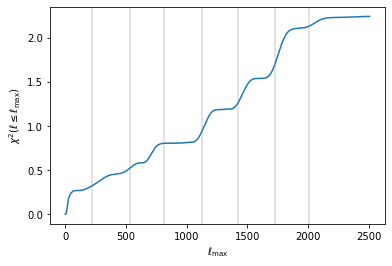

In [131]:
fig=plt.figure(0)
ax=fig.add_subplot(111)
#
ax.plot(L[:iMax], Chi2)
#
# Add quick markers to roughly locate the acoustic peaks
for l in L[50:]:
    value = L[l]**2*ClTTPlanck[l]
    nearbyValues = L[l-10:l+10]**2*ClTTPlanck[l-10:l+10]
    if value==np.max(nearbyValues):
        ax.axvline(l, c='gray', alpha=0.3)
#
ax.set_xlabel(r'$\ell_{\rm max}$')
ax.set_ylabel(r'$\chi^2(\ell \leq \ell_{\rm max})$')

plt.show()

This cumulative $\chi^2$ increases every time an acoustic bump is encountered (vertical gray lines). This suggests that the low $\Omega_m$ are excluded by their inability to fit the acoustic bumps.

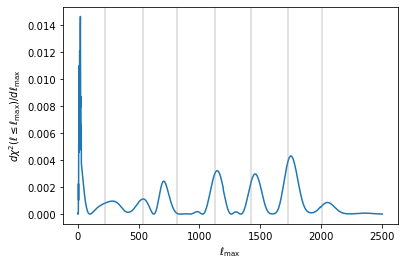

In [135]:
fig=plt.figure(0)
ax=fig.add_subplot(111)
#
ax.plot(L[:iMax-1], Chi2[1:] - Chi2[:-1])
#
# ax.plot(L[:iMax], abs(tCut-t) / sd )
#
# Add quick markers to roughly locate the acoustic peaks
for l in L[50:]:
    value = L[l]**2*ClTTPlanck[l]
    nearbyValues = L[l-10:l+10]**2*ClTTPlanck[l-10:l+10]
    if value==np.max(nearbyValues):
        ax.axvline(l, c='gray', alpha=0.3)
#
#
ax.set_xlabel(r'$\ell_{\rm max}$')
ax.set_ylabel(r'$d \chi^2(\ell \leq \ell_{\rm max}) / d\ell_{\rm max}$')

plt.show()

This differential version shows the same thing.

In [51]:
# with open(path, 'w') as f:
#          f.write("*** "+est+" SNR ***\n")

#          # data and covariance
#          d = self.stackedProfile[filterType+"_"+est+tTh].copy()
#          cov = self.covBootstrap[filterType+"_"+est].copy()
#          dof = len(d)

#          # Compute chi^2_null
#          chi2Null = d.dot( np.linalg.inv(cov).dot(d) )
#          # goodness of fit for null hypothesis
#          f.write("number of dof:"+str(dof)+"\n")
#          f.write("null chi2Null="+str(chi2Null)+"\n")
#          pteNull = 1.- stats.chi2.cdf(chi2Null, dof)
#          f.write("null pte="+str(pteNull)+"\n")
#          # pte as a function of sigma, for a Gaussian random variable
#          fsigmaToPTE = lambda sigma: special.erfc(sigma/np.sqrt(2.)) - pteNull
#          sigmaNull = optimize.brentq(fsigmaToPTE , 0., 1.e3)
#          f.write("null pte significance="+str(sigmaNull)+"sigmas\n\n")

#          # Gaussian model: find best fit amplitude
#          sigma_cluster = 1.5  # arcmin
#          def fdchi2(p):
#             a = p[0]
#             result = (d-a*theory).dot( np.linalg.inv(cov).dot(d-a*theory) )
#             result -= chi2Null
#             return result
#          # Minimize the chi squared
#          p0 = 1.
#          res = optimize.minimize(fdchi2, p0)
#          abest = res.x[0]
#          #sbest= res.x[1]
#          f.write("best-fit amplitude="+str(abest)+"\n")
#          f.write("number of dof:"+str(dof - 1)+"\n\n")

#          # goodness of fit for best fit
#          chi2Best = fdchi2([abest])+chi2Null
#          f.write("best-fit chi2="+str(chi2Best)+"\n")
#          pteBest = 1.- stats.chi2.cdf(chi2Best, dof-1.)
#          f.write("best-fit pte="+str(pteBest)+"\n")
#          # pte as a function of sigma, for a Gaussian random variable
#          fsigmaToPTE = lambda sigma: special.erfc(sigma/np.sqrt(2.)) - pteBest
#          sigma = optimize.brentq(fsigmaToPTE , 0., 1.e3)
#          f.write("best-fit pte significance="+str(sigma)+"sigmas\n\n")

#          # favour of best fit over null
#          f.write("best-fit sqrt(delta chi2)="+str(np.sqrt(abs(fdchi2([abest]))))+"sigmas\n")
#          fsigmaToPTE = lambda sigma: special.erfc(sigma/np.sqrt(2.))
#          pte = fsigmaToPTE( np.sqrt(abs(fdchi2([abest]))) )
#          f.write("pte (if Gaussian)="+str(pte)+"\n")

# Change parameter set?

Switch from $\{ \tau, \omega_b, \omega_c, H_0, n_S, A_S \}$ to $\{ \tau, \omega_b, \omega_m, \theta_\star, n_S, A_Se^{-2\tau} \}$,
by using the chain rule.

# Call the Planck likelihood, to see which ells are most inconsistent?

In [30]:
pathInfo = "/global/cscratch1/sd/eschaan/project_s8/code/cobaya_exploration/input/cobaya/planck18_test.yaml"

In [31]:
info = yaml_load_file(pathInfo)

In [32]:
# Use 'force' to delete existing output
info['force'] = True
# Use 'resume' to start from the end of existing output
#info['resume'] = True
# Use 'debug' to print debug output
#info['debug'] = True

In [33]:
info['packages_path'] = '/global/cscratch1/sd/eschaan/project_s8/code/cobaya_exploration/input/cobaya_packages'

# Exploring how to call CAMB from Cobaya

In [24]:
# Convert parameter array into dictionary
means = samplesPlanck.getMeans()
paramIndices = samplesPlanck._getParamIndices()
meansDict = {}
for key in paramIndices.keys():
    iPar = paramIndices[key]
    meansDict[key] = means[iPar]

# Convert to Cobaya input format
fiducial_params = {
    'ombh2': meansDict['omegabh2'], 
    'omch2': meansDict['omegach2'], 
    'H0': meansDict['H0'], 
    'tau': meansDict['tau'],
    'As': meansDict['A'] * 1.e-9, 
    'ns': meansDict['ns']}


packages_path = '/global/cscratch1/sd/eschaan/project_s8/code/cobaya_exploration/input/cobaya_packages'

info_fiducial = {
    'params': fiducial_params,
    'likelihood': {'one': None},
    'theory': {'camb': {"extra_args": {"num_massive_neutrinos": 1}}},
    'packages_path': packages_path}

l_max = 3000

model_fiducial = get_model(info_fiducial)

# Declare our desired theory product
# (there is no cosmological likelihood doing it for us)
# model_fiducial.add_requirements({"Cl": {'tt': l_max, 'te': l_max, 'ee': l_max}})
model_fiducial.add_requirements({"Cl": {'tt': l_max, 'te': l_max, 'ee': l_max},
                                "thetastar": None})

# Compute and extract the CMB power spectrum
# (In muK^-2, without l(l+1)/(2pi) factor)
# notice the empty dictionary below: all parameters are fixed
model_fiducial.logposterior({})
ClPlanck = model_fiducial.provider.get_Cl(ell_factor=False, units="muK2")

# Our fiducial power spectrum
ClTTPlanck = ClPlanck['tt'][:l_max + 1]
ClTEPlanck = ClPlanck['te'][:l_max + 1]
ClEEPlanck = ClPlanck['ee'][:l_max + 1]
L = np.arange(l_max+1)

[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!


In [25]:
model_fiducial.theory

{'camb.transfers': camb.transfers, 'camb': camb}

In [26]:
model_fiducial.theory['camb'].get_can_provide_params()

{'DAstar',
 'DH',
 'H0',
 'N_eff',
 'TCMB',
 'YHe',
 'Y_p',
 'YpBBN',
 'age',
 'h',
 'kd',
 'keq',
 'ombh2',
 'omch2',
 'omega_de',
 'omegab',
 'omegabh2',
 'omegac',
 'omegach2',
 'omegak',
 'omegal',
 'omegam',
 'omeganu',
 'omk',
 'omnuh2',
 'rdrag',
 'rstar',
 'sigma8',
 'thetad',
 'thetaeq',
 'thetarseq',
 'thetastar',
 'yhe',
 'yheused',
 'zdrag',
 'zeq',
 'zre',
 'zrei',
 'zstar'}

In [27]:
# model_fiducial.theory['camb'].calculate()
# model_fiducial.theory['camb'].get_CAMBdata() 
# model_fiducial.theory['camb'].set_H0_for_theta(meansDict['theta'])
# model_fiducial.theory['camb'].get_allow_agnostic()
model_fiducial.theory['camb']

camb

Get the requested derived parameter.

In [28]:
model_fiducial.theory['camb']._states#.derived_extra
model_fiducial.theory['camb']._states[0]['derived_extra']['thetastar']

1.0411101303617196

In [29]:
import inspect
inspect.getmembers(model_fiducial.theory['camb'])

[('__annotations__', {'external_primordial_pk': bool, 'camb': typing.Any}),
 ('__class__', cobaya.theories.camb.camb.camb),
 ('__deepcopy__', <bound method HasLogger.__deepcopy__ of camb>),
 ('__delattr__',
  <method-wrapper '__delattr__' of camb object at 0x2aaaec591890>),
 ('__dict__',
  {'_measured_speed': None,
   '_name': 'camb',
   'packages_path': '/global/cscratch1/sd/eschaan/project_s8/code/cobaya_exploration/input/cobaya_packages',
   'version': None,
   'path': '/global/cscratch1/sd/eschaan/project_s8/code/cobaya_exploration/input/cobaya_packages/code/CAMB',
   'speed': 0.3,
   'stop_at_error': False,
   'extra_args': {'num_massive_neutrinos': 1, 'lmax': 3000},
   'use_renames': False,
   'external_primordial_pk': False,
   'renames': {'omegabh2': 'ombh2',
    'omegach2': 'omch2',
    'omegal': 'omega_de',
    'omegak': 'omk',
    'yhe': 'YHe',
    'yheused': 'YHe',
    'YpBBN': 'Y_p',
    'zrei': 'zre'},
   'log': <Logger camb (INFO)>,
   'timer': None,
   'camb': <module '